# **Social Media Post Analysis Project**

## **Task 1 - Import required libraries**
 This is usually done at the top of the program.
 Here, you are importing the following required libraries:
 * pandas for creating the dataframe
 * numpy for forming a random number from a range
 * Matplotlib.pyplot for displaying graphs
 * seaborn for plotting the data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

##**Task 2 - Generate random data for the social media data**
Now that you have the required imports, you need to generate some random tweet data to analyze.
 There are many ways to generate random data in Python, but some are more convenient than others.
 In this case, you may use pandas date range to choose a pseudo-random date within a range,
 the random module's choice to create a choice from a list, and numpy's random to create a random integer.
 First of all you need to define a list of categories for the social media experiment.
 The list may include the following, for example: Food, Travel, Fashion, Fitness, Music, Culture, Family, and Health.


In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

 Next, generate a Python data dictionary with fields Date, Category, and number of likes, all with random data.
 You will need the data to align, so the 'Date' dictionary entry should be n periods long.
 The 'Category' should be a list of random choices n entries long
 and the 'Likes' category should be random integers in the range 0 to lets say 10000 also with size equal to n.
 For example, if n is equal to 500:

In [4]:
n = 500 # We will use n = 500 as an example

data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    # Now Use the random method called choice to gather a random category.
    'Category': [random.choice(categories) for _ in range(n)],
    # Then Use numpy's random randint() to form a random integer for the number of likes.
    'Likes': np.random.randint(0, 10000, size=n)
}
print("Sample of generated data:")

Sample of generated data:


In [5]:
# Convert data dictionary to a small DataFrame for display to show what was generated
temp_df = pd.DataFrame(data)
print(temp_df.head())
print("\n")

        Date Category  Likes
0 2021-01-01   Travel   4424
1 2021-01-02  Culture   4465
2 2021-01-03  Fashion   5829
3 2021-01-04     Food   1305
4 2021-01-05    Music   4930




##**Task 3 - Load the data into a Pandas DataFrame and Explore the data**
 The next step is to load the randomly generated data into the pandas dataframe and print the data.
 To do so, we need to use the DataFrame method of the pandas object and pass the data to it.


In [6]:
df = pd.DataFrame(data)
# Then, print the dataframe head, the dataframe information, and the dataframe description.
print("Task 3: Exploring the DataFrame.")

Task 3: Exploring the DataFrame.


In [7]:
print("\nDataFrame Head:")
print(df.head())


DataFrame Head:
        Date Category  Likes
0 2021-01-01   Travel   4424
1 2021-01-02  Culture   4465
2 2021-01-03  Fashion   5829
3 2021-01-04     Food   1305
4 2021-01-05    Music   4930


In [8]:
print("\nDataFrame Information:")
df.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [9]:
print("\nDataFrame Description:")
print(df.describe())


DataFrame Description:
                      Date       Likes
count                  500   500.00000
mean   2021-09-07 12:00:00  4973.80600
min    2021-01-01 00:00:00    52.00000
25%    2021-05-05 18:00:00  2583.50000
50%    2021-09-07 12:00:00  4716.00000
75%    2022-01-10 06:00:00  7291.25000
max    2022-05-15 00:00:00  9992.00000
std                    NaN  2850.67982


In [10]:
# Finally, print the count of each 'Category'element.
print("\nCount of each 'Category' element:")
print(df['Category'].value_counts())
print("\n")


Count of each 'Category' element:
Category
Food       70
Fitness    66
Music      65
Health     65
Fashion    64
Culture    59
Family     56
Travel     55
Name: count, dtype: int64




##**Task 4 - Clean the data**
 An important aspect of processing data is to move invalid data points so you can effectively perform statistics and visualize valid data. The pandas dataframe has built-in functionality to clean the data.
First, remove all the null data using the appropriate dataframe drop method.

In [11]:

df.dropna(inplace=True)
print("Task 4: Data Cleaning.")
print("Null values removed.")

Task 4: Data Cleaning.
Null values removed.


In [12]:
# Next, we want to also remove duplicate data from the dataframe.
# Use a dataframe method to do so.
df.drop_duplicates(inplace=True)
print("Duplicate rows removed.")

Duplicate rows removed.


To appropriately display the data field, convert the dataframe field to a datetime format using the pandas object (not the dataframe).

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
print("Date column converted to datetime format.")


Date column converted to datetime format.


In [14]:

# Next, convert the dataframe 'Likes' data to an integer.
df['Likes'] = df['Likes'].astype(int)
print("Likes column converted to integer format.")

print("\nDataFrame Info after cleaning:")
df.info()
print("\n")

Likes column converted to integer format.

DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB




##**Task 5- Visualize and Analyze the data**
An important aspect of data analysis is the ability to physically view it to visually observe relationships among the data using charts and graphs.
The second way to analyze the data is to perform statistics on it, for example compute the average.First, visualize the data using the seaborn module in a histogram plot of the Likes.
This is accomplished using the method histplot, passing in the dataframe field 'Likes' as in df['Likes'].

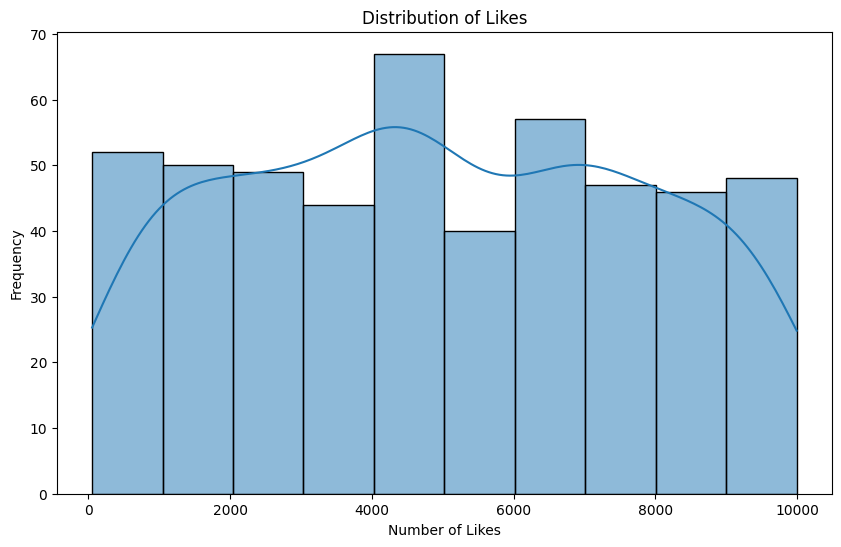

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
# In order to have the histogram show up in the output, use the MathPlotLib.pyplot's show method.
plt.show()

 Next, create a boxplot with the x axis as 'Category', and the y axis as 'Likes'.

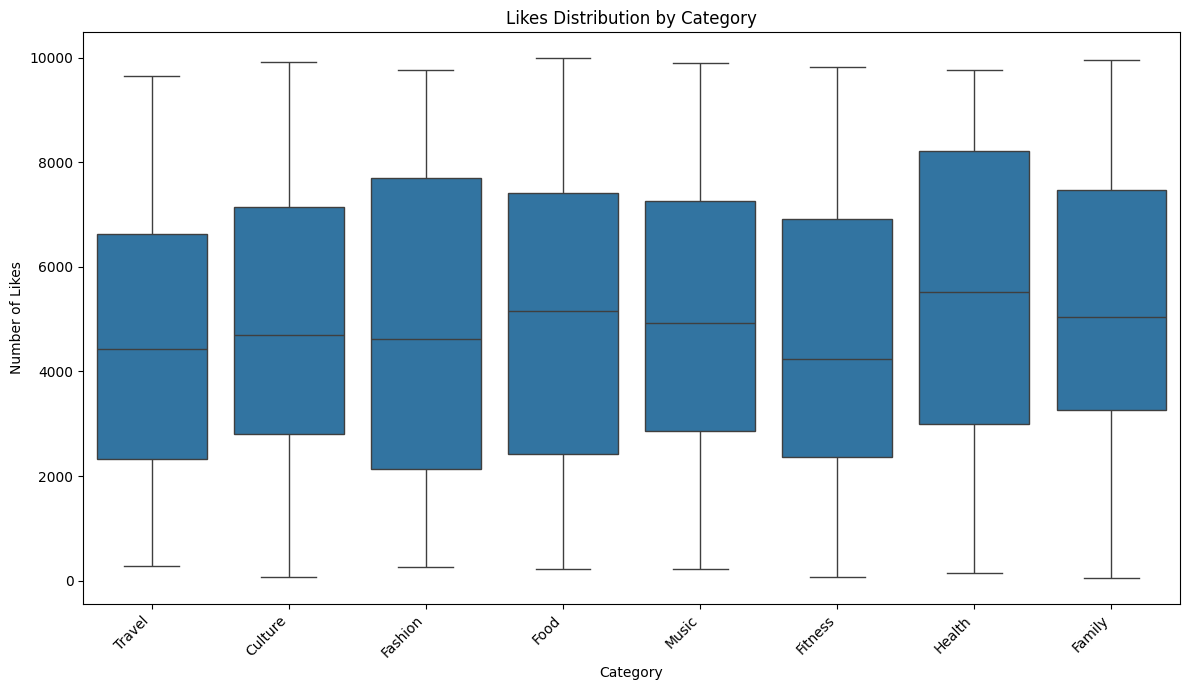

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
# Be sure to also call the pyplot's show method to see the boxplot output.
plt.show()

Now perform some statistics on the data.
First, print out the mean of the 'Likes' category.

In [17]:

print(f"Mean of 'Likes' across all posts: {df['Likes'].mean():.2f}")
print("\n")


Mean of 'Likes' across all posts: 4973.81




In [18]:
# Next,we  use the dataframe's groupby method to print out the mean of each Category 'Likes'.
print("Mean of 'Likes' by Category:")
print(df.groupby('Category')['Likes'].mean().sort_values(ascending=False))
print("\n")

Mean of 'Likes' by Category:
Category
Health     5474.661538
Family     5180.089286
Food       5110.400000
Music      5097.953846
Culture    4971.559322
Fashion    4871.171875
Travel     4546.363636
Fitness    4496.106061
Name: Likes, dtype: float64




##**Conclusion:**

This project involved a comprehensive analysis of simulated social media post data, from initial data generation to visualization and statistical analysis. The goal was to gain insights into post performance based on categories, mimicking a real-world scenario for a social media marketing company.

**Process Overview and Challenges:**
The first step involved importing essential Python libraries: pandas for data manipulation, numpy for numerical operations, matplotlib.pyplot for basic plotting, seaborn for advanced visualizations, and random for data generation. This foundational step ensured all necessary tools were available.

Generating the random dataset was a critical phase. We defined a list of social media categories and then created a dictionary with 'Date', 'Category', and 'Likes' fields. Using `pd.date_range` for dates, `random.choice` for categories, and `np.random.randint` for likes allowed us to create a pseudo-random dataset of a specified size (e.g., 500 entries). A minor challenge here was ensuring the 'n' parameter was consistently applied across all data generation methods to maintain data alignment.

Once the data was generated, it was loaded into a pandas DataFrame. Initial exploration involved printing the DataFrame's head, information, and descriptive statistics, along with value counts for the 'Category' column. This provided an immediate understanding of the data's structure, types, and basic distribution.

Data cleaning was a crucial step to ensure the integrity of our analysis. We used `df.dropna()` to remove any null values and `df.drop_duplicates()` to eliminate redundant entries. Furthermore, we converted the 'Date' column to a proper datetime format using `pd.to_datetime()` and ensured the 'Likes' column was an integer using `astype(int)`. These conversions are vital for accurate plotting and statistical computations.

**Key Findings and Visualizations:**
The visualization phase utilized seaborn and matplotlib to create informative plots. The histogram of 'Likes' provided a clear visual representation of the distribution of engagement across all posts, indicating the frequency of different like counts. This helped identify common engagement patterns.

The boxplot, showing 'Likes' by 'Category', was particularly insightful. It allowed for a direct visual comparison of the distribution and spread of 'Likes' for each content category. For instance, one could observe which categories tended to have higher median likes or a wider range of engagement.

Statistical analysis further supported our visual findings. Printing the overall mean of 'Likes' gave a general measure of engagement. More importantly, grouping the data by 'Category' and computing the mean 'Likes' for each category provided quantitative evidence of which content types performed better on average. This data-driven insight is directly actionable for clients aiming to optimize their social media strategy.

**Improvements and Future Endeavors:**
To enhance this project for future business applications and to set it apart for a portfolio:

1.  **Integration with Real APIs**: Instead of generating random data, connect to actual social media APIs (e.g., Twitter, Facebook Graph API) to gather real-time or historical data. This would make the analysis genuinely actionable and relevant.
2.  **Advanced Text Analysis**: If actual tweet content were available, implement Natural Language Processing (NLP) techniques for sentiment analysis, keyword extraction, and topic modeling. This could reveal deeper insights into audience perception and content effectiveness.
3.  **Time-Series Analysis**: For real data, perform time-series analysis to identify trends, seasonality, and optimal posting times. This could involve forecasting future engagement.
4.  **Interactive Dashboards**: Develop an interactive dashboard using libraries like Plotly or Dash. This would allow clients to dynamically explore the data, apply filters, and gain personalized insights without needing to run code.
5.  **Predictive Modeling**: Implement machine learning models (e.g., regression) to predict the number of likes a post might receive based on its category, time of day, and other features. This would enable proactive content strategy.

This project successfully demonstrates the fundamental steps in data collection, cleaning, analysis, and visualization, providing a strong foundation for more complex social media analytics initiatives.
